In [30]:
#Import dependencies
from requests import get
from bs4 import BeautifulSoup
import re
import os
import json
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import acquire 
from wordcloud import WordCloud
from typing import Dict, List, Optional, Union, cast
from IPython.display import display
from ipywidgets import IntProgress
import acquire
import test
import numpy as np

from env import github_token, github_username

In [2]:
REPOS = ['cashapp/InflationInject',
    'InflationX/ViewPump',
    'rdeits/iris-distro',
    'uhussain/WebCrawlerForOnlineInflation',
    'sandes/zipfly',
    'B3nedikt/ViewPump',
    'inflationcoin/inflationcoin',
    'anishsingh20/Time-series-analysis-of-Inflation-rates-using-ShinyDashboard',
    'stream-utils/inflation',
    'palewire/cpi',
    'p0pr0ck5/lua-resty-tarpit',
    'datasets/inflation',
    'romainpiel/Michelangelo',
    'SHIccc/MTS',
    'Goalsum/POD_STL',
    'corenting/InflationCalculator',
    'forkkit/inflationchart',
    'future-tense/pool.futuretense.io',
    'SOF3/include-flate',
    'gwern/gwern.net',
    'AllonHammer/CPI_HRNN',
    'DIE-BG/HEMI.jl',
    'fipelle/replication-hasenzagl-et-al-2020',
    'christophergandrud/GreenBook',
    'maxitg/InflationSimulator',
    'DangerousFreedom1984/monero_inflation_checker',
    'rsvp/fecon235',
    'Semyonic/apple-store-tr-inflation-price-change-notifier',
    'OpenCMISS-Examples/left_ventricle_inflation',
    '16GMCN/MTH-9886-Emerging-Market-and-Inflation',
    'MosheLichman/ZIP-Regression',
    'seyonv/MIE479',
    'EricSchles/inflation_calc',
    'fddxl/mesh_inflation',
    'Naman-ntc/3D-HourGlass-Network',
    'MathSci/fecon236',
    'ONSvisual/inflation-calculator',
    'ace-subido/ph-inflation-calculator',
    'vefunder/crvfunder',
    'HoagieT/Inflation-Nowcast-Model',
    'datasets/cpi-gb',
    'JLiekenbrock/inflation',
    'OpenBB-finance/MacroDatabase',
    'rjrosati/Inflation.jl',
    'asaenzg/mscthesis',
    'alekseinetsunajev/InflationExpectationsCode',
    'LeonMG/Neutrinos',
    'k-batista/inflation',
    'mbjoseph/vif',
    'BigOyayubi/ZstdUnity',
    'pascalmichaillat/intermediate-macro',
    'pesobitph/pesobit-source',
    'BenjiKCF/Hong-Kong-Big-Data-Downloader-',
    'srguiwiz/inflation',
    'acrdlph/inflationary-token',
    'kranthikittu/Android_inflation',
    'TariqAHassan/EasyMoney',
    'aurelienHamouti/legislative_inflation',
    'rozgo/eosio.inflation',
    'koksoya/inflation-forecast',
    'itamarcaspi/core-inflation',
    'fernote7/Inflation',
    'nmecsys/Inflation',
    'rpetrich/partialzip',
    'gabrielrvsc/ForecastingInflation',
    'devinsays/salaryinflation',
    'bquast/Cryptocurrency-Inflation',
    'motherjones/inflation-calculator',
    'helpimalive/inflation_cr_expansion',
    'sklise/adjust-for-inflation',
    'rjrosati/inflation-simulation',
    'tonybutt/cosmic-inflation',
    'apontzen/inflation',
    'Ko4ka-Beershire-Co/Inflation-project',
    'phantomachine/SOECB-MARKOV',
    'rioclaro/inflation',
    'fairmat/InflationModels',
    'BenCasselman/inflation',
    'NumCosmo/NumCosmo',
    'fenixnake/inflation',
    'arno-id/inflation-calc',
    'unclearness/inflation_py',
    'mauep2025/Forecast-and-assessment-of-General-Inflation-',
    'Shivamdhar/CSE-472-BotInflationOnYoutube',
    'rbturnbull/ausdex',
    'bricas/dbix-class-datetime-epoch',
    'michaelkirker/Sectoral-Factor-Model-Code',
    'pgxcentre/lambda',
    'fqroldan/Conquest',
    'Lumenaut-Network/tools',
    'grenok/Thesis',
    'DecenterApps/ResistanceProtocol',
    'leeclout/tcpnoise',
    'tylercreeves/PadPal',
    'williamjameshandley/primordial',
    'AntonGroos/EnKF-AI',
    'AlexQuinlivan/Helium',
    'ouro-official/contracts',
    'amaldevp/DelaunayInflation',
    'letsgoexploring/sargent-phillips-curve',
    'malkawenedal/Impact-on-Inflation-due-to-Covid-for-US-Canada',
    'jsa-aerial/jsbgzf',
    'gunthercox/NoCoin',
    'elSomewhere/Time-Series-ML',
    'whitfin/dot-notes-java',
    'zpbrent/magictrain',
    '5G-Cash/5G',
    'winitzki/eternal-inflation-book',
    'austinpracticaldatascience/session_0_inflation',
    'Cryptolyfe/Inflation_Rate_Coin',
    'jeopardization/TubeMaster',
    'geekypy/FRED_MACRO_Inflation',
    'gogo40/MyLittleDragon',
    'htacg/html-tidy.org.api',
    'ucg8j/wage_inflation_calculator',
    'audrey-webb/inflation-unemployment-analysis',
    'glassdooreconomicresearch/Inflation-WageGrowth',
    'sonanmemon/High-Frequency-Inflation-Forecasting',
    'joaoarteiro/inflation-analysis-with-r',
    'mercuryandmercury/inflation',
    'joshuamcurtis/inflation',
    'nastine/inflation',
    'avilarenatac/inflation',
    'rlatofha/Inflation',
    'Alkistis/Inflation',
    'MafiaMelon/inflation',
    'Aysan97/Inflation',
    'adilet000809/Inflation',
    'Vasilis295/inflation',
    'AAKatsko/Inflation',
    'aerler101-1/InflationData',
    'francisbreidenbach/InflationCalc',
    'neojournalist/InflationProject',
    'hyokzzang/InflationStudy',
    'P1xelfehler/InflationCalc',
    'richi404/InflationPredict',
    'teemulatti/inflation',
    'sf19pb1-hardeep-leyl/inflation',
    'hafizheraldi/inflation',
    'venance-riblier/Inflation',
    'latentflip/Inflation',
    'malev/inflation',
    'Robo-Brain/inflation',
    'jy2915/Inflation',
    'gyasis/Inflation',
    'lawli3t/inflation',
    'mattschagas/inflation',
    'nybraskwailia/inflation',
    'JavilyNA/Inflation',
    'Axect/inflation',
    'jacolind/inflation',
    'azieg/Inflation',
    'donfuge/inflation',
    'taivop/inflation',
    'Defimatt/InflationDest',
    'avikalprakash/InflationIPL',
    'InflationRPG/InflationRPG',
    'mrosm20/InflationCalc',
    'atreyarawat123/InflationVisualizations',
    'DeLaboreMercurio/InflationaryReport',
    'Tinchoo21/InflationCalculator',
    'InnovationGod/inflation',
    'brakdag/inflation',
    'erikdean/inflation',
    'stat-hub/Inflation',
    'Dougisnotavailable/inflation',
    'mokhin-denis/InflationCalc',
    'LBJ-Wade/InflationSimulator',
    't-walen/InflationvsUnemployment',
    'Duttabhi/Inflation-Prediction-with-Fuzzy-Logic',
    'FCAI00/inflation',
    'Thue/inflation',
    'dwangdi22/Inflation',
    'UtsabKafle/inflation',
    'esthermead/inflationRate',
    'derek-l-thomas/InflationAdjuster',
    'stevetointon/InflationCalc',
    'dimitriPocheron/InflationCalc',
    'Mateja3m/inflationCalculator',
    'AAKatsko/inflation2',
    'electrostat/InflationCalculator',
    'inflationpartners/inflationsite3',
    'nzbaida/InflationModel',
    'yujung7768903/InflationStudy',
    'Albert-Lepree/InflationScraper',
    'libbytheoharis/inflationApp',
    'Tapiwap/InflationAnalysis',
    'LayMui/InflationCalc',
    'DinoStrate/InflationGame',
    'n1b0rh00d/InflationCalculator',
    'kayraince/inflationCalculator',
    'ani1311/InflationTracker',
    'ForthrightOwl/InflationDashboard',
    'hslil25/InflationAdjuster',
    'katye333/InflationCalculator',
    'MihaelaO6/InflationCalculator',
    'grakseasy/InflationCalculator',
    'marco2012/InflationCalc',
    'deyanmihaylov/InflationModels',
    'EconMike/InflationCode',
    'NevenaDarijevic/InflationCalculator',
    'Asuki/InflationCalculatior',
    'vasarm/InflationPy',
    'bklifek/inflationhr95',
    'PedroBDBaptista/InflationDSystem',
    'revmitcz/inflation',
    'titilas/inflation',
    'richftw/inflation',
    'ayngaranthavanesan/Inflation',
    'emgun/Inflation',
    'economics-databases/Inflation',
    'n1b0rh00d/Inflation',
    'jwalsh160/Inflation',
    'Kevin-Pember/InflationCompair',
    'sasamarjanovic295/InflationCalculator',
    'toofarm/InflationCalculator',
    'jlopp/bitcoinflation',
    'gigal0l/InflationRate',
    'David3456789/InflationNews',
    'MrVideo/InflationCalculator',
    'katye333/InflationCalc',
    'johnpm-12/inflationdeflationerc20',
    'abdulla401/InflationCalc',
    'EconMike/InflationPrices',
    'williams-enabulele/InflationCalc',
    'tomsaunders98/InflationCalc',
    'adamoxford/InflationData',
    'ttvrdic/inflation',
    'ratulesrar3/inflation',
    'florjaco/Inflation',
    'hyanc/inflation',
    'timmocharis/inflation',
    'hugues-m/inflation',
    'joseph3001g/Inflation',
    'fatemehosseininsb/inflation',
    'levyhot/Inflation',
    'ashernoel/inflation',
    'nmecsys/inflationApp',
    'MichaelPRivera/InflationProject',
    'dcenteno99/InflationLimit',
    'mishadovhiy/inflationApp',
    'heythisispaul/inflationBot',
    'SepehrBorji/InflationCalculator',
    'yudumpacin/InflationRates',
    'paholg/inflation',
    'pgooch/inflation',
    'rbagd/inflation',
    'dannhek/inflation',
    'Moomay/inflation',
    'maalokweng/inflation',
    'AlexanderIbrahim1/Inflation',
    'frankij11/inflation',
    'alva922/Inflation',
    'EconMike/InflationProducerPrice',
    'dmastylo/Inflation',
    'simplizm-company/inflation',
    'SofianeBo/Inflation',
    'cbrunet93/inflation',
    'AsherDvirDjerassi/inflation',
    'paulatmg/inflation',
    'zoe454/TVPVAR',
    'ledlaputa72/Android_InflationStudy',
    'Mustimain/InflationRateMachineLearning',
    'rasult22/InflationStoreVueJS',
    'GulzarAhmedButt/InflationAnalysisUsingPython',
    'terminal-labs/inflation',
    'dillonchr/inflation',
    'mahdanahmad/inflation',
    'Dashtikh/inflation',
    'jhcwalsh/Inflation',
    'jaronritter01/InflationRatePrediction',
    'enriquemung1688/inflation',
    'diotimae/inflation',
    'ciyer/inflation',
    'anna-willmann/Inflation',
    'P4tt4te/inflation',
    'jjarrin96/inflation',
    'rlouf/inflation',
    'trevortombe/inflation',
    'ghgr/InflationRealTime',
    'marco2012/InflationCalcFlutter',
    'Siko91/inflationDataScraper',
    'timxiao1203/inflationBondCurve',
    'InflationVideoTV/InflationVideoTV',
    'HackerIndustrial-web3/real-yields-InflationBonds',
    'mpfarrho/tvp-qr',
    'EconMike/InflationReportApril',
    'Efe-C-3/InflationRateAnalytics',
    'hubert-mis/R-szeregi',
    'UrosNikolic95/InflationMiniExperiment',
    'pjreij98/InflationGroceryApp',
    'AdamVicko/JavaScript-InflationCalculator',
    'ckyle6300/InflationFreeUSD',
    'DIE-BG/InflationFunctions.jl',
    'ycc1107/InflationLinkedBond',
    'lynema-dev/InflationSwapRiskLadders',
    'pizzanomnommer/Inflation_Simulator',
    'hendrik49/ews-inflation',
    'emma-jinger/InflationAndSP500',
    'hgeorge21/JSC370-inflationAnalysis',
    'shawn8777/Inflation',
    'moriahcosta/Inflation',
    'cran/Inflation',
    'georgelee144/inflation',
    'kcnnn/inflation',
    'maescobar132/inflation',
    'siwey/Inflation',
    'mediafin/inflation',
    'FernandoBarbosa-proj/InflationForecastR_ST_LT',
    'jangheeseung/android_inflation',
    'nw11/Inflate.jl',
    'kensor/Tent-app',
    'Behodler/weidai',
    'Tarik1407/Inflation-',
    'Owenrags/Upload_inflation',
    'shiro8x8/projectinflation',
    'econchick/Inflatr',
    'shehio/FED-Interest-Rate',
    'pjreij98/InflationGroceryAppNotWorking',
    'joshuahoffmanr91/Inflation-',
    'bloopton/InflationEconomics-Research-ColumbiaU',
    'kristoiv/CppByteArray',
    'dkhaz/bingo',
    'amman08/Venezuela-Crisis',
    'crimsoncantab/inflationrpg',
    'alissontenorio/inflationmoney',
    'nima-karami/inflationometer',
    'alexbmontiel/inflation-expectations',
    'Only1abu/inflationproject',
    'nickk124/inflationaryfields',
    'jondekerh/Inflationizer',
    'crrmacarse/inflationcalculator',
    'alexisakov/mmipireplica',
    'dnyabogaO/inflation_cpi_model',
    'ufukreis/Inflation-Calculator-Application-C-Language',
    'rjbs/class-dbi-hasvariant',
    'Refinitiv-API-Samples/Article.EikonAPI.Python.InflationVsDCAFund',
    'Dawenster/inflationatr',
    '1998vss/inflationcalc',
    'LucasBelpaire/inflationcalculator',
    'inflationandmarkets/inflationandmarkets',
    'bellabellabe/inflationuncertainty',
    'sjohns21/investigating_fandango_ratings',
    'cleancoindev/fair-inflation-v2',
    'clustersdata/Inflation-of-the-Parachute',
    'inflationaryepoch/inflationaryepoch',
    'shayaa/vifplot',
    'SachinHotkar/Variance-inflation-factor-VIF-',
    'pmuilu/econ_data',
    'marinewater/inflation-austria',
    'jbowmer/RBAInflationForecasts',
    'elliott-wen/InfamousInflation-SwiftLaTex',
    'Inflation-Partners/inflation.github.io',
    'RanjithRShetty/Variance-inflation-factor-VIF-',
    'ZgjimDida/inflation-in-kosovo',
    'raddy123/UKIP',
    'local-optimum/inflation_calculator',
    'sandy-goli/time-series-analysis',
    'syyunn/inflhedge-suppchain',
    'zahidaliayub/inflationcoin',
    'alirezaebrahimi96/plot-inflation-rate-in-python-cosmology-',
    'TidySigma/Unexpected_Inflation',
    'liamnickell/inflation-calc',
    'DrStevenHess/R-Sources',
    'bdemeshev/inflation.project',
    'sdglhm/inflation-lk',
    'pgg1309/uk-inflation',
    'adityamodi11/Inflation-Web-App',
    'jharwerth56/Inflation-Apparatus',
    'RGGH/finance',
    'seanbae/CatNap',
    'kopper/money',
    'milan-mooibroek/npm-index-inflation-calculator',
    'emoreno911/Inflotto',
    'totallyviable/inflator',
    'Binary-Finery/UKInflationCalculator',
    'prawn15/ATIS',
    'zachwe/inflation-adjuster',
    'patrykrybaczek/resolve-inflation',
    'joaquinlpereyra/cuotitas',
    'Tortolala/Inflatiometer',
    'akinjyde/Constitutive-modeling-of-extension-inflation-test-data',
    'jwilk/inflacja',
    'camillanore/Inflastudy',
    'DamianBednarczyk/master_s_degree',
    'aml888/Inflation-Calc',
    'daniel08/inflation_scraper',
    'clpo13/inflation-calc',
    'typpo/Inflation-Calculator',
    'JosephBrunet/tension_inflation',
    'denisburnashev/inflation-table',
    'BarGanor/Imported_Inflation',
    'beetlejuice16/inflation-calculator',
    'bhattsiddharth/inflation-project',
    'FacePunch1337/Inflation-Callback',
    'DaGenix/inflationstation.net',
    'andylow1704/Inflation_Forecasting',
    'NoahSato/Inflation.-Project',
    'bogdantomicic/inflation_calculator',
    'nchukalovskiy/spark-inflation',
    'alexisarte/inflation-calculator',
    'BCzyzewski/Inflation_Dashboard',
    'fvillarreal27/Inflation_Forecast',
    'aml888/inflation-calculator',
    'yzygithub/inflation-calculate',
    'sarah-springer/AF_Inflation',
    'ivan-cc-cc/Education-Inflation',
    'MaxKocheshkov/Dynamic_inflation',
    'nbadino/gtrend-inflation',
    'andreacutrera/Forecasting-Inflation',
    'lvdonofrio14/Inflation-ML',
    'argray17/inflation-calculator',
    'shiro8x8/project-inflation',
    'RexDeux/Inflation-Dashboard',
    'fndpires/BRAZIL-Inflation',
    'SolvingInflation/SolvingInflation',
    'Beyramayadi/inflation-calculator',
    'harunsaracevicc/Inflation-rate',
    'mnperic/forecasting-inflation',
    'shoemaker/calc-inflation',
    'Cheo21/inflation-calculator',
    'natrajvairavan5/Predicting-Inflation',
    'vn-quant/inflation-eu',
    'OGADAMo/inflation-calculator',
    'N1ktt/SUSin-inflation',
    'maritsandstad/CorpInflation',
    'rossngreenwood/eternal_inflation',
    'IoannisPapadakis/inflation-cpi',
    'FouadAElNahal/LayoutInflation',
    'jakepscott/Inflation-Analysis',
    'YizhouLouisLu/Inflation_computation',
    'bhaveshkumar80/Medical-Inflation',
    'jy2915/Inflation_202107',
    'ruhl0029/inflation-markets',
    'KieranStewart-Phillips/Upload_inflation',
    'InteligenciaEmpresarial/Inflation_tracker',
    'natalierw/food-inflation',
    'gafnts/Inflation-forecasting',
    'dsofe/inflation-data',
    'kgroble/grade-inflation',
    'CristiPriciu/Inflation-Calculator',
    'ivan-cc-cc/Education-Inflation-',
    'anduckworth/ml_inflation',
    'SedimentaryRockStar/Inflation_Prediction',
    'zyxd/inflation-api',
    'aditya4274/Inflation-forecast',
    'eakande/gdp_inflation',
    'pccostapt/european-inflation',
    'djvex/inflation-sucks',
    'ajraduenz/graphics-inflation',
    'garcialn/Inflation_Prediction',
    'kylemouly/Forecasting-Inflation',
    'xhp4y8/admin_inflation',
    'Junying123/test_inflation',
    'LeifAndersenGH/Inflation-Visualization',
    'elmarmertens/trendInflation',
    'harunsaracevicc/Inflation-calculator',
    'VSStole/Inflation-Calculator',
    'dadaset/reprovacao-inflation',
    'EntropistA/inflation-visualization',
    'cpohkwan/food-inflation',
    'HerrDiesel/pln-inflation',
    'NjaNja7/inflation-calculator',
    'cptanalatriste/inflation-tracker',
    'cramaechi/inflation-calculator',
    'ahjames11/shinyInflation',
    'federalfundstracker/Inflation-Adjuster',
    'Judas503/Inflation-code',
    'tkmymini/reconfigure_inflation',
    'jolyonb/starting-inflation',
    'carrowkeel/inflation_model',
    'sebidelamata/dollarInflation',
    'plaguedoctor39/russia_inflation',
    'minjukum/Eternal-Inflation',
    'thanut303/inflation-token',
    'ariqd/CalcInflation',
    'wwkkww/inflation-calc',
    'glass9/inflation-calculator',
    'bobcatCA/stimulus_inflation',
    'ginaaheeb/inflation-2021',
    'jelilat/inflation-dashboard',
    'TheLandStander/inflation-calculator',
    'rita-milani/Inflation_barchart',
    'ay13/inflation-api',
    'kevinpavani/GDP-Inflation',
    'gweymann2/MSSM-Inflation',
    'kbaro/inflation-calculator',
    'CadenceElaina/Inflation-Calculator',
    'craig552uk/uk-inflation',
    'keesvanz/Inflation-Calculator',
    'justthetips/ml_inflation',
    'emgriffin6/predict_inflation',
    'maritaria/inflation-calculator',
    'shawn8777/Inflation-master',
    'mariobraga/inflation-calculator',
    'japroc/numbeo_inflation',
    'sharmaumang001/Layout_inflation',
    'bfopengradient/Inflation_elasticities',
    'sobcza11/Inflation---ARCHIVE',
    'jrosenko/Inflation_project',
    'stanicaa/inflation_qa',
    'LuizAlexandre21/Rnn_Inflation',
    'LBJ-Wade/inflation-simulation',
    'LilKedin/Inflation_Model',
    'Frenchwa42/inflation-repo',
    'enricoruggieri/inflationreports_API',
    'mrcszym/food-inflation',
    'dzonidevv/Inflation-Calculator',
    'Angela-Merkel-Tree/inflation-data',
    'gentiang/inflation_analysis',
    'heisxiang/purchasing-power',
    'pinglinh/inflation_calculator',
    'ako1983/US-Inflation',
    'sgraffite/inflationary-english',
    'rfcoffee/Symmetron-Inflation',
    'AhmedAmirBC/inflation-project',
    'Esperantar/inflation_calc',
    'itamarcaspi/wage-inflation',
    'dynamonda/inflation-unity',
    'jsnns/personal-inflation',
    'Brainstorrrm/Inflation-Chart',
    'Rep17/Upload_inflation',
    'juliapratt/Upload_inflation',
    'edgarcutar/covid_inflation',
    'JohnFeola/INFLATION-TRACKER',
    'razumau/rating_inflation',
    'SupratikRulz/web-scraper-inflationeu',
    'Asrorbek-Orzikulov/inflation_rate',
    'talhaamir4130/pk-inflation-bot',
    'insideTheEconomy/fed_inflation',
    's-a-y/mass-inflation',
    'seanmfox/inflation-calculator',
    'ParasVc98/Inflation-Monitor',
    'MattM240499/RankInflation',
    'jmsbutcher/inflation_predictor',
    'ShrutiGupta97/Inflation-Targeting',
    'drjuarez/btc-inflation',
    'ecasanovas/inflation_intrate',
    'alanwhite1203/fiInflation',
    'valerieboctor/CBAs-Inflation',
    'esiu-23/inflation_minwage',
    'vasilije7/Inflation-Calculator',
    'connorpainter/rgf-inflation',
    'mathieu-clement/inflation_calculator',
    'ivana7f/inflation-calculator',
    'ThomasArcherDX/Molbar-Inflation',
    'BBC-Data-Unit/gin-inflation',
    'exabyteso/inflation-tool',
    'Karagul/ForecastingInflation',
    'dhense177/Rethinking_Inflation',
    'iamrishav111/LinkInflation',
    'Relatora/Inflation-Plotter',
    'lamobot/inflation_index',
    'swatiasnani10/Inflation_Paper',
    'skad00sh/vif',
    'julienpetitot/de_inflation',
    'andrewsalber/inflation-calculator',
    'Sitenl/bra-inflationtools',
    'maximality/inflation-app',
    'skestelman/adjust_inflation',
    'diayan/Inflation-Calculator',
    'xsiruse/DJ_Inflation',
    'Printassia/Inflation-Calculator',
    'thiagoomenez/Inflation_factors',
    'hazevt04/inflation_calculator',
    'futureclint/inflation-station',
    'pedrofnuness/inflation-calc',
    'terminal-labs/inflation-states',
    'Bora-Ulu/Inflation-Technique',
    'Warfelz16/zero-inflation',
    'Real-John-Cheung/NFT-Inflation',
    'fgreve/chilean_inflation',
    'ktm21/pln-inflation',
    'nachosdt/scraping-inflation',
    'litotechenterprise/Inflation-Calculator',
    'marciosantetti/inflation-talk',
    'abigailtmorgan/Forecasting-Inflation',
    'Zumairaka/Inflationary_Token',
    'Duilwing/Inflation_Expectations',
    'JeremyPeresDev/WorldInflation',
    'kmirijan/Inflation_Expectation',
    'larsmoe/xai-inflationsrecher',
    'GuilleMGN/PortfolioVSInflationAnalysis',
    'paezha/Demand-and-Supply-Inflation-in-Floating-Catchment-Area-FCA-Methods-',
    'phil20686/Measuring-Inflation',
    'josegalvez/multifield-inflation',
    'mgm5338/compound-inflation',
    'irvin-welsh/inflation_counter',
    'dankaufmann/historical_inflation',
    'jacoduplessis/cpi-inflation',
    'MADS-MarisaRivera/Predicting-Inflation',
    'alberoman/rapid-inflation',
    'LBJ-Wade/Inflation.jl',
    'nondejus/bijstandsuitkering-inflation',
    'duembgen-lutz/TailInflation',
    'KBuck2018/inflation-frontend',
    'karenz50/inflation_analysis',
    'sbutler-gh/anti-inflationary',
    'szavaryn/inflation_issue',
    'SwatiSethee/Inflation-Forecasting-using-SARIMAX-and-NKPC-Economic-Model',
    'dhesse/FoodInflation',
    'kwalt/inflation_calculator',
    'russsik1/inflation_bot',
    'codeoholic/inflation.live',
    'metinelitas/TurkeyInflation',
    'agodil/inflation-calculator',
    'dzolotor/inflation-nation',
    'anticmex/inflation_HW',
    'Jjcaligiuri77/Inflation_calculator',
    'srguiwiz/inflation-outdated',
    'taeyoung94/Inflation_Analysis',
    'hamzamalick21/ProjectInflation',
    'rodrigoaguerrero/inflation_calculator',
    'daha6801/Inflation_Analysis',
    'nculjak/Inflation-Calculator',
    'lastunicorn/Inflation-Calculator',
    'FurkanToprak/inflation.ninja',
    'baydogan/fullstack-inflation',
    'CHC2022/Inflation-Hedge',
    'eshaben/inflation-squid',
    'foxsnow38/InflationRateToCentralBankOfTurkeyBetween2012_2022',
    'bonarbridge/inflation-stats',
    'spleenhouse/fisting',
    'michaeljunokas/inflation_adjusted_ticker',
    'joepalardy/Inflation_Block',
    'Characterlimit/Cosmic-Inflation',
    'fernote7/Inflation_Expectations',
    'dybushnell/inflation_db',
    'jedaboin/inflation-exp',
    'noname1014/Aggressive-Inflation',
    'VinniciusPS/Inflation-Calculator',
    'greedisgud/Inflation-Tracker',
    'RM503/Stochastic_Inflation',
    'shruti-misra/inflation_viz',
    'whoisnnamdi/cochrane-inflation',
    'Dusan2001/Inflation-Kalkulator',
    'rlivianu/inflation_rnd',
    'ruhl0029/inflation-consequences',
    'arkgah/inflation-rest',
    'clpo13/inflation-calc-c',
    'itsnotbubs/ZHAW-Scientific-Programming-GroupProject',
    'Gant1855/Project-1-Group-2',
    'cran/sifds',
    'Lazyprod/Lab04',
    'jwg4/british-inflation-data-from-literature',
    'clustersdata/1998-MCM-B-Grade-Inflation',
    'xenakas/inflation_targeting',
    'bacoco/inflation-ml',
    'jasoncable/inflation-calc',
    'terminal-labs/inflation-precursor',
    'hully-rolemberg/inflation-midas',
    'SlimBenTanfous/inflation-rate',
    'jaycode/inflation_damodaran',
    'UBICenter/inflation-qtom',
    'NaveenGali11/Inflation-Calculator',
    'tdhock/grade-inflation',
    'Mojisibe/Inflation-rate',
    'david-isailovich/Inflation-Calculator',
    'context-dependent/inflation-adjustment',
    'Peyman2012/Calculate-inflation',
    'emilioosmenaiv/US_Inflation',
    'vincentbagilet/causal_inflation',
    'Pierre-BenoitG/Inflation-Forecast',
    'styounessi/Inflation_Dashboard',
    'teovonkesselstatt/inflation_targetting',
    'J-Isaula/Inflation-Forecast',
    'EricMasonFa/tsi-inflation-adjusted',
    'mtwn105/personal-inflation-calculator',
    'kpomerleau/taxbrackets',
    'taskie/mystig',
    'zhaohualu/ZISDE',
    'juliokozarewicz/ipca',
    'OmikM/visualization-of-inflation-data',
    'fqroldan/inflapstion',
    'freeman129/RO_rAthena_inflation_in_NPC_shop',
    'covenasdl/ARIMA',
    'spider000111/emi_effect',
    'leejustin/sf-software-salary',
    'zq00/glmhd',
    'IeuanG/HyperInflation-CountDown',
    'sriyapradhan/LaborForce-and-Inflation',
    'kevin910162/Inflation-Linked-Bond-Design',
    'NekomammaT/stochastic_long_inflation',
    'blake5634/US-Historical-Inflation',
    'LQG-Florida-Atlantic-University/cos_pert_inflation',
    'joshuarichard/time-inflation-converter',
    'anees-patwa/payment-inflation-project',
    'DylanMcBean/BalloonInflationGame',
    'anushkau/Inflation-rate-forecasting',
    'lopeselio/Chainlink-Inflation-Dashboard-Oracle',
    'tulicsgabriel/Variance-Inflation-Factor-VIF-',
    'john-mcmullan/Inflation_MinWage_Groceries',
    'RodrigoCalleia/Inflation-Interest-and-Unemployment',
    'urvish7/Inflation_Unemployment_InterestRate',
    'SaiGuy1/change-in-inflation',
    'sing1/Layout-Inflation-as-Intended',
    'MarcusMLarsson/Forecasting-Inflation-Stacked-Regressions',
    'biruk-chafamo/Scalar_Field_Inflation',
    'isk-lie/hfwu_pension_n_inflation',
    'Monika2101/Inflation_rate_Prediction',
    'firstwan/malaysia-inflation-rate',
    'FurkanToprak/inflation.ninja-backend',
    'yahya-maged/World-Inflation-SQL',
    'juujulio/inflation-br-today',
    'manasgithub005/Project-Inflation-Forecasting',
    'larsmoe/inflationsrechner_base_functions',
    'nazriz/inflation_population_over_time',
    'saleel/stable',
    'theshubhagrwl/ValueMyMoney',
    'danec/adjusted_for_inflation',
    'digdig514/ExerciceLayoutInflation',
    'FUlyankin/Russia_inflation_map',
    'rakhab/Gaps_Slacks_and_Inflation',
    'ander265/box-office-inflation',
    'terminal-labs/inflation_vmware-cluster',
    'sekerez/Argetina_Inflation_Graph',
    'aldo18001/Inflation-Forecast-w-LSTM',
    'ghiles10/Econometrics-Inflation-R',
    'Yashshah0223/Inflation-rate-forecast',
    'sobcza11/The-US-Inflation-Phenomenon',
    'AAVP/nn_chile_inflation',
    'p-gw/ZeroInflation.jl',
    'BlackteaGit/StopGreyGooInflation',
    '8W9aG/inflation-parsing-node',
    'prosmx/personal-inflation-rate-calculator',
    'toribasso/Inflation_and_Wages_Website',
    'amer-islamovic/Stock_v_Inflation',
    'bedirhanasn/Forecasting-Turkiye-Inflation-Rate',
    'wi-ll-ow/UE-R-Inflationmod',
    'phatjkk/world_inflation_data',
    'edgardoa91/inflation_analysis_1',
    'techmexdev/Nasa-Spending',
    'andrewjrickard/weimar',
    'Tining123/DemonMarket',
    'marckrivitzky/US-Inflation-Rate',
    'abhishekmishra/india-inflation-analysis',
    'ONSvisual/Inflation-and-pay',
    'terminal-labs/inflation_complex-cluster',
    'yadolph/dj-templates-inflation',
    'LiliyaVerchenko/Django3_inflation',
    'mickeythemouse/Inflation-vs-unemployment',
    'waspyfaeleith/salary_inflation_calculator',
    'FilipKnj/Inflation-Calculator-App-',
    'calvenjs/Inflation-Forecasting-with-LSTM',
    'ONSSamBennett/inflation-calculator-v2',
    'KameshNanduri26/Inflation-Rates-Dash-App',
    'shuiruge/functions-for-cosmological-inflation',
    'LaurieScheepers/sa-inflation-calculator',
    'thunderrabbit/Stack-Overflow-layout-inflation',
    'dsementsov/bvar-inflation-seminar',
    'darrencarlin/Personal-Inflation-Calculator',
    'terminal-labs/inflation_wolfram-cluster',
    'Abdelrahmanamhawy/Contaigus-inflation-rate',
    'shubhamgupta568/Variance-Inflation-Factor',
    'Leschonander/latam-inflation-scraper',
    'golabkowy/inflation-monitor-client',
    'meryjoy99/Correlators-From-Inflation',
    'Maura-Santos/final_product_inflation_rate',
    'iannjari/cbk-inflation-prediction',
    'ValeriaNavarro26/inflation_report_R',
    'KhyatiPiprotar/R-Studio-Inflation-Project',
    'fscheler/Inflation_Outlook_US',
    'hvlabat/nhs_income_vs_inflation',
    'RM503/PBH_from_USR_inflation',
    'numerical-perspective/inflation-on-pension',
    'EnmanuelMinaya/dop-inflation-calculator',
    'ShaneSCalder/Project_Inflation_Risk_Impacts',
    '2020711mimi/Modelling-UK-inflation-quarterly-',
    'bsurmanski/inflation_card_simulator',
    'Javerunion/anticipation_inflation_index',
    'victor3105/django_inflation_table',
    'AdrianGR15/P4_inflation',
    'lehito21/brazilian_inflation_data',
    'africadatahub/adh-africa-inflation',
    'Terry-Migwi/Inflation-Rates-Kenya',
    'omarespejel/apprecio_decentralized_inflation',
    'eriksandstrom88/US-Dollar-Inflation-Modeling',
    'V4p1d/Tips-Inflation-Attack',
    'EuranetPlus/inflation-rate-april',
    'ordinaries/inflation-for-the-meremortals',
    'JaroslavKotrba/AppForecastingInflation',
    'decadeofdata/Inflation-data-science',
    'guardian/interactive-ons-inflation-calculator',
    'Satnamsingh937/Inflation-Trading-Strategy',
    'cfmdobbie/SalaryVsInflationUK',
    'cptanalatriste/inflation-tracker-extension',
    'kayuzee/frontier-inflation-dashboard',
    'ONSdigital/dp-inflation-helper',
    'lambdaclass/monetary_base_inflation_scraper',
    'tamartsi/Variant_specific_inflation',
    'Ross-McCandless/ExtractYearlyInflationRates',
    'hpadilla6201/PA4-Inflation_Guessing',
    'jennyqqu/inflation_index_webscrap',
    'raj-rao-rr/Investor-Inflation-Expectations',
    'DenisAzarenko777/Inflation-in-Russia',
    'TheCheesyT/US-inflation-Data-Analysis',
    'cnordenlow/us-inflation-monitor',
    'SShanshina/django-3-inflation',
    'tryton-ar/account_inflation_adjustment_ar',
    'Somreeta-maity/Inflation_data_analysis',
    'ervinkellym/GroceryInflationD3',
    'africadatahub/adh-inflation-database',
    'YohannTonnerre/laravue-inflation-rpg',
    'krb19-econ/EDA-Inflation-and-Unemployment',
    'entekang/Predict_inflation_Twitter',
    'SolitaryIbra/Estimate-Cost-By-inflation',
    'matheusmafraoandrade/Inflation-Index-Model-Comparison',
    'SaleemZYounus/Python-Global-Inflation-Plot',
    'zuoche/Inflation_AA-markers',
    'jdrsqrd/Simple-Inflation-Calculator',
    'countxyz/mta_fare_inflation',
    'Chunyin1/interest-inflation-calculator',
    'tdewolff/opencmiss-lung-inflation',
    'DobyRahnev/staircase_meta_inflation',
    'SanteriVtj/inflation-and-unemployment-lr',
    'PsicoThePato/RTT-inflation-calculator',
    'ArjunVelayutham/Earnings-vs-Inflation',
    'anakov/Inflation-Growth-Mirror',
    'KorayKarakas/Numerically-Exploring-Cosmological-Inflation',
    'ross-k/bitcoin-vs-inflation-tracker',
    'thanhqtran/chile-inflationtarget-ols',
    'toribasso/Inflation-and-Wages',
    'amarcerim/bawag-inflation-calculator',
    'matthieufisher/2022-Inflation-Forecasting-Project',
    'yg2804/analysis_of_inflation_dynamics',
    'slangcake/Inflation_demand_supply_decomposition',
    'sasikirankaye/Global-inflation-rate-analysis',
    'gobied/LargeFieldInflation',
    'psylabs/Food-Inflation-Index',
    'kyranjamie/uk-inflation-calculator',
    'cristinagf/pyInflationHousing',
    'mouryaa/fandango-movie-inflation-analysis',
    'sidchakravarty79/Growth-Inflation-Model',
    'dbacy/GermanInflationRates',
    'n1b0rh00d/StaticInflationWebsite',
    'naomi172839/DATA610Inflation',
    'jshapi16/gdp-income-inflation-dashboard',
    'masuta16/WebcrawlerOnlineInflation',
    'worldOneo/HypixelInflationTracker',
    'MartinRV19/arg-inflation-prediction-2022',
    'vivekkanna26/Turkey-Food-Price-Inflation',
    'DaviMAC02/BRL-INFLATION-RATE-ANALYSIS',
    'gitmainaks/Inflation-Forecasting-using-R',
    'ArhamChoudhury/01_Unexpected_Inflation',
    'JohnFeola/INFLATION-TRACKER2',
    'punnal/Measuring-Latency-inflation',
    'Mdjunaid04/Inflation-Rate-in-India',
    'antonioACR1/predicting-inflation-with-arima',
    'PihuReet/R_CompareInflation',
    'EducationShinyAppTeam/Variance_Inflation_Factor',
    'ChrisOrgan/Generalized-Variance-Inflation-Factor',
    'kt1720/Phillips-curve-and-inflation',
    'immanuelsakkilian/Inflation-Data-Analysis',
    'dzolotor/inflation_is_theft',
    'jessems/WeimarInflationData',
    'AndreasLM03/Inflation-Data-Scraper',
    'yash-srivastav/Inflation-Targeting-in-India',
    'ieatcarpets/price-inflation-in-skyblock',
    '8W9aG/inflation-browser-extension',
    'AxodusDAO/inflation-control-contracts',
    'fscheler/Inflation_Outlook_EZ',
    'Manu-Gr/Project---Forecasting-Inflation',
    'longjivwamhi/Fandango-Ratings-Inflation-Analysis',
    'dosanity/unemployment-inflation-analysis',
    'kassiili/two-period-inflation',
    'supratiksarkaremp22/WebCrawlerForInflation',
    'mklewandowski/inflation-stress-reduction',
    'debanil-hutech/Inflation-Next-App',
    'mateuszschab/Global-inflation-and-investment',
    'lexieheinle/inflation-vs-unemployment',
    'InflationX/inflationx.github.io',
    'tatmush/Youtube-Views-Inflation',
    'bjdodson/RecyclerViewInflations',
    'ferdianakbar/GradeInflationFuzzy',
    'lowsaelee/us-inflation-data',
    'HodanYusuf9/Visualize-Inflation-for-2019',
    'OmegaMarkXII/Project-DKI-Inflation',
    '8W9aG/inflation-smart-contract',
    'LUNDR/inflation_forecasts_with_tf',
    'millerngit/RateOfInflation',
    'iamdingkai/what-s-driving-inflation',
    'jrbsn/Inflation-Deep-Learning',
    'fscheler/Inflation_Tracker_World',
    'jacobrosen1997/ECON323-Inflation']

In [3]:
from acquire import get_readme_download_url

In [4]:
headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

if headers["Authorization"] == "token " or headers["User-Agent"] == "":
    raise Exception(
        "You need to follow the instructions marked TODO in this script before trying to use it"
    )

In [5]:
df = pd.read_csv('inflation_readme.csv', index_col=0)
df

,repo,language,readme_contents
0,cashapp/InflationInject,Kotlin,# Inflation Injection\n\nConstructor-inject vi...
1,InflationX/ViewPump,Kotlin,ViewPump\n========\n\nView inflation you can i...
2,rdeits/iris-distro,Matlab,Introduction\n============\n\nThis package con...
3,uhussain/WebCrawlerForOnlineInflation,Python,# Table of Contents \n1. [Introduction](README...
4,sandes/zipfly,Python,[![Build Status](https://img.shields.io/circle...
...,...,...,...
843,millerngit/RateOfInflation,C++,NaN
844,iamdingkai/what-s-driving-inflation,Jupyter Notebook,NaN
845,jrbsn/Inflation-Deep-Learning,NaN,# Inflation-Deep-Learning\nPredicts opening fo...
846,fscheler/Inflation_Tracker_World,HTML,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 847
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             848 non-null    object
 1   language         727 non-null    object
 2   readme_contents  611 non-null    object
dtypes: object(3)
memory usage: 26.5+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 839
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             523 non-null    object
 1   language         523 non-null    object
 2   readme_contents  523 non-null    object
dtypes: object(3)
memory usage: 16.3+ KB


In [9]:
df.head()

,repo,language,readme_contents
0,cashapp/InflationInject,Kotlin,# Inflation Injection\n\nConstructor-inject vi...
1,InflationX/ViewPump,Kotlin,ViewPump\n========\n\nView inflation you can i...
2,rdeits/iris-distro,Matlab,Introduction\n============\n\nThis package con...
3,uhussain/WebCrawlerForOnlineInflation,Python,# Table of Contents \n1. [Introduction](README...
4,sandes/zipfly,Python,[![Build Status](https://img.shields.io/circle...


In [10]:
df

,repo,language,readme_contents
0,cashapp/InflationInject,Kotlin,# Inflation Injection\n\nConstructor-inject vi...
1,InflationX/ViewPump,Kotlin,ViewPump\n========\n\nView inflation you can i...
2,rdeits/iris-distro,Matlab,Introduction\n============\n\nThis package con...
3,uhussain/WebCrawlerForOnlineInflation,Python,# Table of Contents \n1. [Introduction](README...
4,sandes/zipfly,Python,[![Build Status](https://img.shields.io/circle...
...,...,...,...
834,lexieheinle/inflation-vs-unemployment,CSS,# For the Love of the Money\n[![Code Issues](h...
836,tatmush/Youtube-Views-Inflation,Python,# Youtube-Views-Inflation\nInflate your youtbe...
837,ferdianakbar/GradeInflationFuzzy,Java,# GradeInflationFuzzy\n
838,lowsaelee/us-inflation-data,Jupyter Notebook,# us-inflation-data\n\nData source: https://ww...


## Prepare

In [11]:
import unicodedata
import re
import json
import nltk
import test
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd

In [12]:
#Define a function to clean text data
def basic_clean(string):
    
    string = string.lower()
    
    string = unicodedata.normalize('NFKD', string).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    string = re.sub(r"[^a-z0-9\s']", '', string)
    
    return string

In [13]:
#Define a function to tokenize text
def tokenize(string):
    
    tokenizer = ToktokTokenizer()
    
    return tokenizer.tokenize(string, return_str=True)

In [14]:
#Define a function to stem text data using the PorterStemmer
def stem(string):
    
    ps = nltk.porter.PorterStemmer()
    
    stems = [ps.stem(word) for word in string.split()]
    
    stemmed_string = ' '.join(stems)
    
    return stemmed_string

In [15]:
#Define a function to lemmatize text
def lemmatize(string):
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    lemmas = [wnl.lemmatize(word) for word in string.split()]
    
    lemmatized_string = ' '.join(lemmas)
    
    return lemmatized_string

In [16]:
#Define a function to remove stopwords from a string of text
def remove_stopwords(string, extra_words=None, exclude_words=None):
    
    stopword_list = stopwords.words('english')
    
    if exclude_words:
        
        stopword_list = stopword_list + exclude_words
        
    if extra_words:
        
        for word in extra_words:
            
            stopword_list.remove(word)
            
    words = string.split()
    
    filtered_words = [word for word in words if word not in stopword_list]
    
    filtered_string = ' '.join(filtered_words)
    
    return filtered_string

In [17]:
df.head()

,repo,language,readme_contents
0,cashapp/InflationInject,Kotlin,# Inflation Injection\n\nConstructor-inject vi...
1,InflationX/ViewPump,Kotlin,ViewPump\n========\n\nView inflation you can i...
2,rdeits/iris-distro,Matlab,Introduction\n============\n\nThis package con...
3,uhussain/WebCrawlerForOnlineInflation,Python,# Table of Contents \n1. [Introduction](README...
4,sandes/zipfly,Python,[![Build Status](https://img.shields.io/circle...


In [18]:
#Apply a series of functions to clean the news articles text
df['clean'] = df['readme_contents'].apply(basic_clean).apply(tokenize).apply(remove_stopwords)
df

,repo,language,readme_contents,clean
0,cashapp/InflationInject,Kotlin,# Inflation Injection\n\nConstructor-inject vi...,inflation injection constructorinject views xm...
1,InflationX/ViewPump,Kotlin,ViewPump\n========\n\nView inflation you can i...,viewpump view inflation intercept viewpump ins...
2,rdeits/iris-distro,Matlab,Introduction\n============\n\nThis package con...,introduction package contains iris algorithm i...
3,uhussain/WebCrawlerForOnlineInflation,Python,# Table of Contents \n1. [Introduction](README...,table contents 1 introductionreadmemdintroduct...
4,sandes/zipfly,Python,[![Build Status](https://img.shields.io/circle...,build statushttpsimgshieldsiocirclecibuildgith...
...,...,...,...,...
834,lexieheinle/inflation-vs-unemployment,CSS,# For the Love of the Money\n[![Code Issues](h...,love money code issueshttpswwwquantifiedcodeco...
836,tatmush/Youtube-Views-Inflation,Python,# Youtube-Views-Inflation\nInflate your youtbe...,youtubeviewsinflation inflate youtbe views usi...
837,ferdianakbar/GradeInflationFuzzy,Java,# GradeInflationFuzzy\n,gradeinflationfuzzy
838,lowsaelee/us-inflation-data,Jupyter Notebook,# us-inflation-data\n\nData source: https://ww...,usinflationdata data source httpswwwkagglecomv...


In [19]:
#Create a column of lemmatized articles
df['lemmatized'] = df['clean'].apply(lemmatize)

In [20]:
df.head()

,repo,language,readme_contents,clean,lemmatized
0,cashapp/InflationInject,Kotlin,# Inflation Injection\n\nConstructor-inject vi...,inflation injection constructorinject views xm...,inflation injection constructorinject view xml...
1,InflationX/ViewPump,Kotlin,ViewPump\n========\n\nView inflation you can i...,viewpump view inflation intercept viewpump ins...,viewpump view inflation intercept viewpump ins...
2,rdeits/iris-distro,Matlab,Introduction\n============\n\nThis package con...,introduction package contains iris algorithm i...,introduction package contains iris algorithm i...
3,uhussain/WebCrawlerForOnlineInflation,Python,# Table of Contents \n1. [Introduction](README...,table contents 1 introductionreadmemdintroduct...,table content 1 introductionreadmemdintroducti...
4,sandes/zipfly,Python,[![Build Status](https://img.shields.io/circle...,build statushttpsimgshieldsiocirclecibuildgith...,build statushttpsimgshieldsiocirclecibuildgith...


## Explore

In [21]:
#Import dependencies
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import acquire as aq
from wordcloud import WordCloud

In [22]:
#Create a function to automate the process
def make_ngrams(words, n):
    
    return pd.Series(nltk.ngrams(words, n))\
                         .value_counts()\
                         .head(20)

In [23]:
df.language.value_counts()

Python              102
Jupyter Notebook     96
JavaScript           61
R                    55
HTML                 46
Java                 24
C++                  13
TypeScript           13
CSS                  10
TeX                   9
Ruby                  8
C#                    8
Julia                 8
C                     8
MATLAB                6
Matlab                5
Kotlin                5
Stata                 5
Swift                 4
PHP                   4
Mathematica           4
Solidity              4
Shell                 3
Svelte                2
Fortran               2
Dart                  2
Objective-C           2
SaltStack             2
FreeBasic             1
Processing            1
PostScript            1
CMake                 1
Clojure               1
Vyper                 1
Vue                   1
Rust                  1
Arduino               1
Scala                 1
Lua                   1
FORTRAN               1
Name: language, dtype: int64

In [24]:
#Join the words together into one body of text
df_words = ' '.join(df['lemmatized'])

(-0.5, 399.5, 199.5, -0.5)

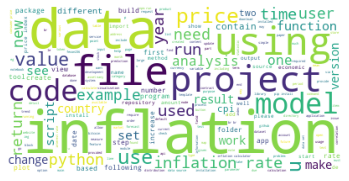

In [25]:
#Create a word cloud of 
df_img = WordCloud(background_color='white').generate(df_words)
plt.imshow(df_img)
plt.axis('off')

In [36]:
list(df_words.split())

['inflation',
 'injection',
 'constructorinject',
 'view',
 'xml',
 'layout',
 'inflation',
 'looking',
 'assisted',
 'inject',
 "'",
 'built',
 'dagger',
 'nowhttpsdaggerdevdevguideassistedinjectionhtml',
 'usage',
 'write',
 'layout',
 'xml',
 'like',
 'normal',
 'xml',
 'linearlayout',
 'comexamplecustomview',
 'textview',
 'linearlayout',
 'use',
 'inflationinject',
 'customview',
 'java',
 'public',
 'final',
 'class',
 'customview',
 'extends',
 'view',
 'private',
 'final',
 'picasso',
 'picasso',
 'inflationinject',
 'public',
 'customview',
 'inflated',
 'context',
 'context',
 'inflated',
 'attributeset',
 'attrs',
 'picasso',
 'picasso',
 'supercontext',
 'attrs',
 'thispicasso',
 'picasso',
 'order',
 'allow',
 'dagger',
 'create',
 'custom',
 'view',
 'add',
 'inflationmodule',
 'dagger',
 'module',
 'add',
 'generated',
 'module',
 'name',
 'includes',
 'java',
 'inflationmodule',
 'moduleincludes',
 'inflationinjectpresentermoduleclass',
 'abstract',
 'class',
 'presente

In [38]:
#Create bigrams.. what's happening here?
top_20_df_bigrams = make_ngrams(df_words, 2)

top_20_df_bigrams.head()

(e,  )    10804
(i, n)     9503
(o, n)     8463
(a, t)     8335
(t, i)     7240
dtype: int64

In [31]:
df.language = np.where(df.language == 'Jupyter Notebook', 'Python', df.language)

In [44]:
df.language = np.where((df.language != 'Python') & (df.language != 'R') & (df.language != 'JavaScript'), 'Other', df.language)

In [32]:
df[df.language == 'Python']

,repo,language,readme_contents,clean,lemmatized
3,uhussain/WebCrawlerForOnlineInflation,Python,# Table of Contents \n1. [Introduction](README...,table contents 1 introductionreadmemdintroduct...,table content 1 introductionreadmemdintroducti...
4,sandes/zipfly,Python,[![Build Status](https://img.shields.io/circle...,build statushttpsimgshieldsiocirclecibuildgith...,build statushttpsimgshieldsiocirclecibuildgith...
9,palewire/cpi,Python,### Links\n\n* Docs: [palewi.re/docs/cpi/](htt...,links docs palewiredocscpihttpspalewiredocscpi...,link doc palewiredocscpihttpspalewiredocscpi c...
11,datasets/inflation,Python,"Inflation, GDP deflator (annual %) and Inflati...",inflation gdp deflator annual inflation consum...,inflation gdp deflator annual inflation consum...
20,AllonHammer/CPI_HRNN,Python,# Forecasting CPI Inflation with Hierarchical ...,forecasting cpi inflation hierarchical recurre...,forecasting cpi inflation hierarchical recurre...
...,...,...,...,...,...
829,kassiili/two-period-inflation,Python,# two-period-inflation\n\nThis code was used t...,twoperiodinflation code used analyse nparticle...,twoperiodinflation code used analyse nparticle...
830,supratiksarkaremp22/WebCrawlerForInflation,Python,# Introduction\n**Price Crawler: Tracking Pric...,introduction price crawler tracking price infl...,introduction price crawler tracking price infl...
836,tatmush/Youtube-Views-Inflation,Python,# Youtube-Views-Inflation\nInflate your youtbe...,youtubeviewsinflation inflate youtbe views usi...,youtubeviewsinflation inflate youtbe view usin...
838,lowsaelee/us-inflation-data,Python,# us-inflation-data\n\nData source: https://ww...,usinflationdata data source httpswwwkagglecomv...,usinflationdata data source httpswwwkagglecomv...


In [33]:
#Define a function to clean the text
def clean(text, exclude_words):
    
    text = aq.basic_clean(text)
    
    text = aq.lemmatize(text)
    
    text = aq.remove_stopwords(text, exclude_words=exclude_words)
    
    return list(text.split(' '))

In [41]:
#Create a list of words only found in lemmatized business articles
python_words = list(' '.join(df[df.language == 'Python']['lemmatized']).split())

python_words.value_counts()

['table',
 'content',
 '1',
 'introductionreadmemdintroduction',
 '2',
 'pipelinereadmemdpipeline',
 '3',
 'requirementsreadmemdrequirements',
 '4',
 'environment',
 'set',
 'upreadmemdenvironment20setup',
 '5',
 'repository',
 'structure',
 'run',
 'instructionsreadmemdrepository20structure20and20run20instructions',
 'introduction',
 'price',
 'crawler',
 'tracking',
 'price',
 'inflation',
 'project',
 'completed',
 '3',
 'week',
 'insight',
 'data',
 'engineering',
 'program',
 'new',
 'york',
 '20b',
 'session',
 'goal',
 'project',
 'calculate',
 'inflation',
 'rate',
 'first',
 'principle',
 'mean',
 'calculating',
 'inflation',
 'rate',
 'using',
 'price',
 'good',
 'service',
 'sold',
 'online',
 'project',
 'built',
 'pipleine',
 'use',
 'petabyte',
 'web',
 'page',
 'data',
 'contained',
 'common',
 'crawlhttpscommoncrawlorg',
 'archive',
 'web',
 'page',
 'content',
 'calculate',
 'inflation',
 'rate',
 'result',
 'used',
 'enhance',
 'investment',
 'strategy',
 'business',


In [43]:
pd.Series(python_words).value_counts()

inflation     538
'             433
data          420
price         221
model         170
             ... 
164             1
xlsx            1
csvoutput       1
politician      1
choropleth      1
Length: 5834, dtype: int64

In [46]:
df.language.value_counts()

Other         209
Python        198
JavaScript     61
R              55
Name: language, dtype: int64

In [48]:
#Create a list of words only found in lemmatized business articles
r_words = list(' '.join(df[df.language == 'R']['lemmatized']).split())

pd.Series(r_words).value_counts()

inflation            155
'                    141
data                  83
r                     57
rate                  51
                    ... 
watson                 1
w                      1
mark                   1
james                  1
rcompareinflation      1
Length: 2022, dtype: int64

In [49]:
#Create a list of words only found in lemmatized business articles
javascript_words = list(' '.join(df[df.language == 'JavaScript']['lemmatized']).split())

pd.Series(javascript_words).value_counts()

'                                            116
file                                          97
npm                                           70
run                                           70
inflation                                     66
                                            ... 
accuracy                                       1
lot                                            1
actually                                       1
department                                     1
documentationhttpsnextjsorgdocsdeployment      1
Length: 2116, dtype: int64

In [50]:
#Create a list of words only found in lemmatized business articles
other_words = list(' '.join(df[df.language == 'Other']['lemmatized']).split())

pd.Series(other_words).value_counts()

'                                                                                  415
inflation                                                                          371
&#9;                                                                               234
data                                                                               150
file                                                                               149
                                                                                  ... 
httpswwwbigoididstatistikindikatortargetinflasiaspx                                  1
httplontaruiacidfilefiledigital133040t2027828identifikasi20faktorpendahuluanpdf      1
gegeneinander                                                                        1
neuer                                                                                1
gradeinflationfuzzy                                                                  1
Length: 6671, dtype: int64

In [51]:
from pprint import pprint

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

#from prepare import basic_clean, lemmatize


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from env import user, password, host



tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.readme_contents)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)
